In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('대학백과_삼육대_리뷰.csv')
df

,Unnamed: 0,0
0,0,"학교 이름부터가 삼육대학교이다. 즉, 이 학교는 삼육종교를 믿는 교인들을 위한 학교..."
1,1,상담심리학과는 원래 기독교상담학과였음. 목사가 강의하는 수업도 있음. 신학과출신 교...
2,2,학교는 나쁘지 않다. 인서울 누릴 수 있지만 내부는 생각보다 종교로 매우 고인 곳이...
3,3,말리고 싶다 오지마라 제발 코로나시국이어도 영어연극 강제로 시킨다 수업 맘대로 째는...
4,4,21세기에도 이런 학교가 있나 싶어.. 일단 여기는 주소 위치만 서울뿐인 신학대야;...
...,...,...
631,631,미컨이 현재 없어진 과 이지만 아디과가 커디와 미컨을 합쳐 놓았기에 아주 좋은 조합...
632,632,종교강요 거부감 없으면 나쁘진않음 그러나 종교인들에대한 차별이 있는편임 예를들어 그...
633,633,학교친구들은 좋음 교수님도좋음 그러나과정이 너무빡셈
634,634,교수님들도 친절하시고 학교가 깨끗하고 좋다.


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df

,리뷰
0,"학교 이름부터가 삼육대학교이다. 즉, 이 학교는 삼육종교를 믿는 교인들을 위한 학교..."
1,상담심리학과는 원래 기독교상담학과였음. 목사가 강의하는 수업도 있음. 신학과출신 교...
2,학교는 나쁘지 않다. 인서울 누릴 수 있지만 내부는 생각보다 종교로 매우 고인 곳이...
3,말리고 싶다 오지마라 제발 코로나시국이어도 영어연극 강제로 시킨다 수업 맘대로 째는...
4,21세기에도 이런 학교가 있나 싶어.. 일단 여기는 주소 위치만 서울뿐인 신학대야;...
...,...
631,미컨이 현재 없어진 과 이지만 아디과가 커디와 미컨을 합쳐 놓았기에 아주 좋은 조합...
632,종교강요 거부감 없으면 나쁘진않음 그러나 종교인들에대한 차별이 있는편임 예를들어 그...
633,학교친구들은 좋음 교수님도좋음 그러나과정이 너무빡셈
634,교수님들도 친절하시고 학교가 깨끗하고 좋다.


In [ ]:
review_text = ''
for temp in df['리뷰']:
    review_text += str(temp)
review_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',review_text)
review_text

'학교 이름부터가 삼육대학교이다  즉  이 학교는 삼육종교를 믿는 교인들을 위한 학교이다  각 과엔 10 정도 교인을 위한 전형을 두고 성적이 좀 부족해도 입학할수있게 했다  심지어 약대 간호대도  전세계에 이종교를 믿는 사람 수는 2천만명정도이고 국내에선 20만명언저리인데  소수종교집단에서 만든 학교이고 학생정원수는 채워야하니 나머지는 비종교인도 입학할수있도록 했고 그렇게 돈을 벌어서 학교운영을 하고 있는것으로 보임  대부분의 교수진 교직원 심지어 매점직원 전부다 종교인임  즉 이 학교는 교인을 위한 학교  근로장학생이나 교내대회  학점도 종교인을 많이 챙겨주고 그들을 위한 제도가 많음  결국 비종교인 학생들은 그들의 희생양이 되는 것  기숙사의 대부분의 층장 임원은 종교믿는 학생들  학식엔 채식을 기반으로한 종교인을 위한 식단들뿐이다  학교운영방침도 금요일오후부터 안식일준비로 인해 교내 모든부서가 퇴근함  금연 금주캠퍼스라서 비종교인이어도 교내에서 술마시거나 담배펴도 다들 큰일나는줄알며 난리가 난다  이학교는 애초에 교인들을 위해 세워진 학교다  그리고 그들이 성적이 좀 낮아도 약대 간호대 등을 갈수있도록 전형도 만들었다  이 학교는 교인을 위한 학교이고 그렇다보니 개교 100주년이 넘었어도 대학은 연구를 하는곳인데 같은 종교 사람들만 뽑아서 서로 친목질을 하는 유사대학에 불과했고 그렇다보니 발전이 없다  애꿎은 비교인 학생들은 이 학교 입학하면서 희생당한다  채식을 강요받고 20세가 넘은 성인인데도 금연금주를 강요받고 채플7학기 필참도 강요받는다  심지어 기숙사생은 11시 매일 점호  토요일엔 밖에서 들려오는 교회소리  밖에서 음주하고 기숙사에 귀가하는것도 강제퇴사사유  이렇게 강요받는데 우리의 등록금은 대부분 교인을 위해 쓰인다  사실 교내대회  근로장학생  기숙사임원  층장은 교인들이 꽉잡고 있으니까  인서울이 전부가 아니고 입결이 전부가 아님  이 학교는 발전을 할수없음  종교를 내려놓기전까진 인서울 최하위대학일거임  근데 이학교 설립된 계기는 교인

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(review_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('학교', 'Noun'), ('이름', 'Noun'), ('부터가', 'Josa'), ('삼', 'Modifier'), ('육', 'Modifier'), ('대학교', 'Noun'), ('이다', 'Josa'), ('즉', 'Noun'), ('이', 'Noun'), ('학교', 'Noun'), ('는', 'Josa'), ('삼', 'Modifier'), ('육', 'Modifier'), ('종교', 'Noun'), ('를', 'Josa'), ('믿는', 'Verb'), ('교인', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('학교', 'Noun'), ('이다', 'Josa'), ('각', 'Noun'), ('과', 'Noun'), ('엔', 'Josa'), ('10', 'Number'), ('정도', 'Noun'), ('교인', 'Noun'), ('을', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('전형', 'Noun'), ('을', 'Josa'), ('두고', 'Verb'), ('성적', 'Noun'), ('이', 'Josa'), ('좀', 'Noun'), ('부족해도', 'Adjective'), ('입학', 'Noun'), ('할수있게', 'Verb'), ('했다', 'Verb'), ('심지어', 'Noun'), ('약대', 'Noun'), ('간호', 'Noun'), ('대도', 'Noun'), ('전세계', 'Noun'), ('에', 'Josa'), ('이', 'Determiner'), ('종교', 'Noun'), ('를', 'Josa'), ('믿는', 'Verb'), ('사람', 'Noun'), ('수', 'Noun'), ('는', 'Josa'), ('2천만', 'Number'), ('명정도이고', 'Foreign'), ('국내', 'Noun'), ('에선', 'Josa'), ('20만', 'Number'), ('명언저리인데', 'Fo

In [ ]:
#제외할 단어 추가
stop_words = "삼육대 학교 대학 학과 학생 교수 수업 때문 입니다 정말 사람 생각 " #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('종교', 277),
 ('서울', 139),
 ('취업', 122),
 ('있는', 82),
 ('전공', 76),
 ('공부', 71),
 ('추천', 70),
 ('캠퍼스', 68),
 ('좋은', 66),
 ('강요', 65),
 ('정도', 60),
 ('항공', 60),
 ('학식', 59),
 ('장학금', 59),
 ('학년', 59),
 ('고기', 58),
 ('전과', 57),
 ('매우', 55),
 ('상담', 53),
 ('채플', 52),
 ('진짜', 52),
 ('과목', 52),
 ('친구', 51),
 ('그냥', 51),
 ('없음', 50),
 ('좋음', 50),
 ('있고', 49),
 ('관련', 49),
 ('걱정', 48),
 ('대부분', 47),
 ('시설', 45),
 ('편입', 44),
 ('교내', 43),
 ('지원', 43),
 ('없다', 42),
 ('별로', 41),
 ('지방', 40),
 ('담배', 39),
 ('우리', 39),
 ('졸업', 39),
 ('없는', 39),
 ('교인', 38),
 ('여기', 38),
 ('없고', 38),
 ('학점', 37),
 ('느낌', 37),
 ('커리큘럼', 37),
 ('많고', 36),
 ('영어', 35),
 ('다른', 35),
 ('좋아요', 34),
 ('사실', 33),
 ('선배', 33),
 ('있어요', 33),
 ('조금', 33),
 ('진로', 32),
 ('많음', 31),
 ('아웃', 31),
 ('메리트', 31),
 ('자격증', 31),
 ('종교인', 30),
 ('자체', 30),
 ('후문', 30),
 ('학부', 30),
 ('취업률', 30),
 ('나름', 30),
 ('기독교', 29),
 ('차라리', 29),
 ('대학교', 28),
 ('전형', 28),
 ('처음', 28),
 ('인식', 28),
 ('후회', 27),
 ('있어서', 27),
 ('분위기', 27),
 ('기숙사

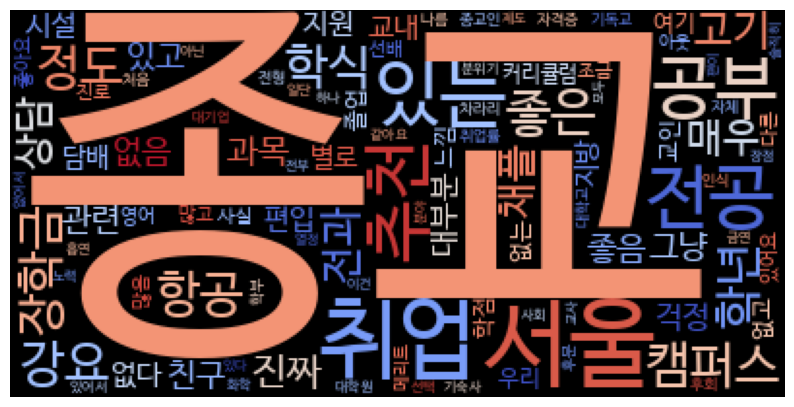

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('대학백과_삼육대_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()

In [ ]:
# 워드클라우드 복붙
wordcloud_1 = str(tags)
wordcloud_1 = wordcloud_1.replace("'",' ')
wordcloud_1

'[( 종교 , 277), ( 서울 , 139), ( 취업 , 122), ( 있는 , 82), ( 전공 , 76), ( 공부 , 71), ( 추천 , 70), ( 캠퍼스 , 68), ( 좋은 , 66), ( 강요 , 65), ( 정도 , 60), ( 항공 , 60), ( 학식 , 59), ( 장학금 , 59), ( 학년 , 59), ( 고기 , 58), ( 전과 , 57), ( 매우 , 55), ( 상담 , 53), ( 채플 , 52), ( 진짜 , 52), ( 과목 , 52), ( 친구 , 51), ( 그냥 , 51), ( 없음 , 50), ( 좋음 , 50), ( 있고 , 49), ( 관련 , 49), ( 걱정 , 48), ( 대부분 , 47), ( 시설 , 45), ( 편입 , 44), ( 교내 , 43), ( 지원 , 43), ( 없다 , 42), ( 별로 , 41), ( 지방 , 40), ( 담배 , 39), ( 우리 , 39), ( 졸업 , 39), ( 없는 , 39), ( 교인 , 38), ( 여기 , 38), ( 없고 , 38), ( 학점 , 37), ( 느낌 , 37), ( 커리큘럼 , 37), ( 많고 , 36), ( 영어 , 35), ( 다른 , 35), ( 좋아요 , 34), ( 사실 , 33), ( 선배 , 33), ( 있어요 , 33), ( 조금 , 33), ( 진로 , 32), ( 많음 , 31), ( 아웃 , 31), ( 메리트 , 31), ( 자격증 , 31), ( 종교인 , 30), ( 자체 , 30), ( 후문 , 30), ( 학부 , 30), ( 취업률 , 30), ( 나름 , 30), ( 기독교 , 29), ( 차라리 , 29), ( 대학교 , 28), ( 전형 , 28), ( 처음 , 28), ( 인식 , 28), ( 후회 , 27), ( 있어서 , 27), ( 분위기 , 27), ( 기숙사 , 26), ( 대기업 , 26), ( 하나 , 26), ( 화학 , 26), ( 대학원 , 25), ( 흡연 , 25), ( 분야